# Exploratory Data Analysis

Here we are exploring the data to understand it better and to establish the statistical properties of the data.

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Data//customer_booking.csv", encoding ="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Make a new feature

We want to establish customer behaviour in order to have a trip on holiday(weekend), so we are goinng to make a feature called
is_weekend. If the flight day is Saturday or Sunday we give is_weekend value=1, for another value, it is given a value of 0.

In [12]:
is_weekend = []
for  i in range(len(df)):
    if df['flight_day'][i]==6 or df['flight_day'][i]==7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


# Analyze data

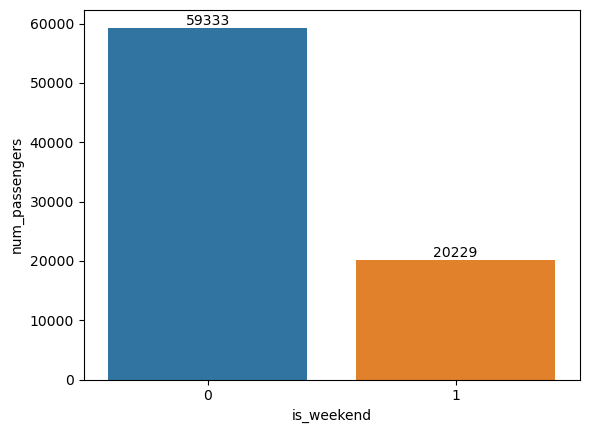

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x = 'is_weekend',y = 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

What is the average number of passengers per day

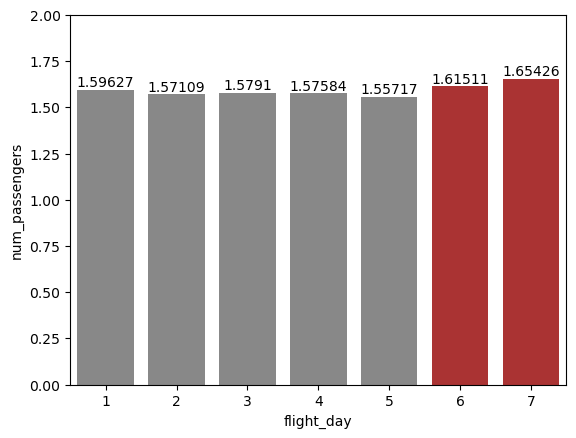

In [14]:
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

ax = sns.barplot(data = dayperday, x = 'flight_day', y= 'num_passengers')
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
ax.bar_label(ax.containers[0])
plt.ylim(0,2)
ax.patches[5].set_facecolor('#aa3333')
ax.patches[6].set_facecolor('#aa3333')
plt.show()

From the chart, it is evident that the number of passenger on weekends is less than the number of flights on weekdays. If you consider the average, the weekends have a higher value. 
Let us establish which routes have schedules on weekends with the most passengers.

In [15]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)


In [16]:
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


The routes above have the most passengers, we need to increase the number of flights to these 5 routes on weekends.

# Making a machine learning model

Dropping columns with many redundant features

In [17]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

It is clear route has 799 unique values, this is too large a figue and hence we delete route column

In [18]:
df.drop('route',axis = 1, inplace = True)

In [19]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

Let us change the value of booking origin from name of country to name of continent.

In [20]:
conda update jupyter

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - jupyter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-build-3.28.3         |  py311haa95532_0         825 KB
    curl-8.5.0                 |       he2ea4bf_0         156 KB
    hvplot-0.9.1               |  py311haa95532_0         3.2 MB
    importlib-metadata-7.0.1   |  py311haa95532_0          49 KB
    importlib_metadata-7.0.1   |       hd3eb1b0_0           8 KB
    ipython-8.20.0             |  py311haa95532_0         1.5 MB
    libcurl-8.5.0              |       h86230a5_0         343 KB
    libmamba-1.5.6             |       hcd6fe79_0         3.9 MB
    libmambapy-1.5.6           |  py311h77c03ed_0         514 KB
    markupsafe-2.1.3           |  py311h2bbff1b_0          28 KB
    numpy-1.26.


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [19]:
!pip install -U jupyter

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install pycountry_convert 

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pytest-mock>=1.6.3 from https://files.pythonhosted.org/packages/b9/25/b29fd10dd062cf41e66787a7951b3842881a2a2d7e3a41fcbb58a8466046/pytest_mock-3.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for pytest-cov>=2.5.1 from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/72/81/51333395798fbb3c720ec92748ecdf17438cd4b593001b73d50fcb66d23d/coverage-7.4.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/209.1 kB ? eta -:--:--
   ----------------- ---------------------- 92.2/209.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 209.1/209.1 kB 2.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    #print(country)
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent




C:\ProgramData\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [22]:
df['booking_continent'].value_counts()

booking_continent
AS        29740
OC        18960
EU          578
NA          525
Others       87
AF           69
SA           41
Name: count, dtype: int64

Now we have less unique values to represent booking origin.

In [23]:
df.drop('booking_origin', axis = 1, inplace=True)

# Data Cleaning

In [24]:
df.sample()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
22248,1,Internet,RoundTrip,60,41,7,3,1,0,1,6.42,0,0,AS


C:\Users\User\AppData\Local\Temp\ipykernel_8852\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1576697857.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


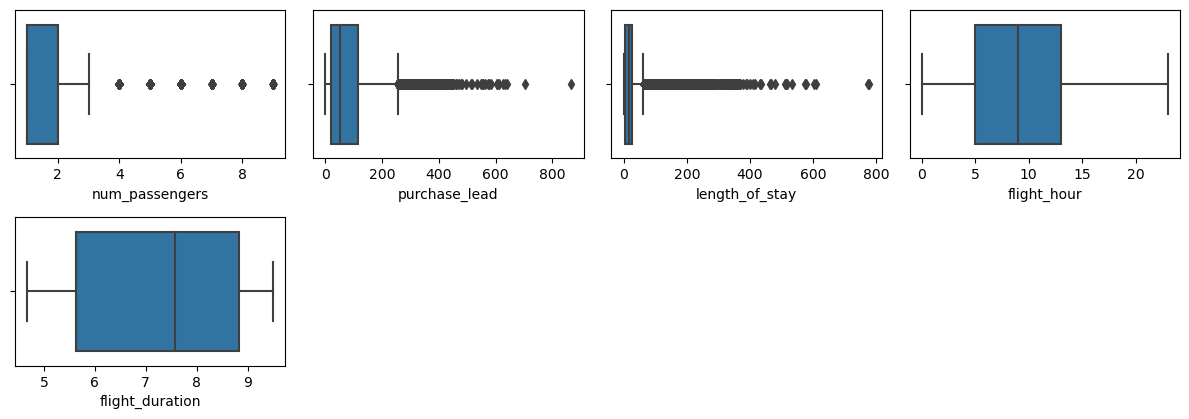

In [25]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

from the charts above, it is evident that length_of_stay & purchase_lead have outlier values. We shall eliminate these outliers.

In [26]:
from scipy import stats
import numpy as np

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]
    
print(f'Total rows after delete outlier : {len(df)}')

Total rows before delete outlier : 50000
Total rows after delete outlier : 47115


C:\Users\User\AppData\Local\Temp\ipykernel_8852\1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1639804563.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


C:\Users\User\AppData\Local\Temp\ipykernel_8852\1601306130.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1601306130.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1601306130.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\1601306130.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


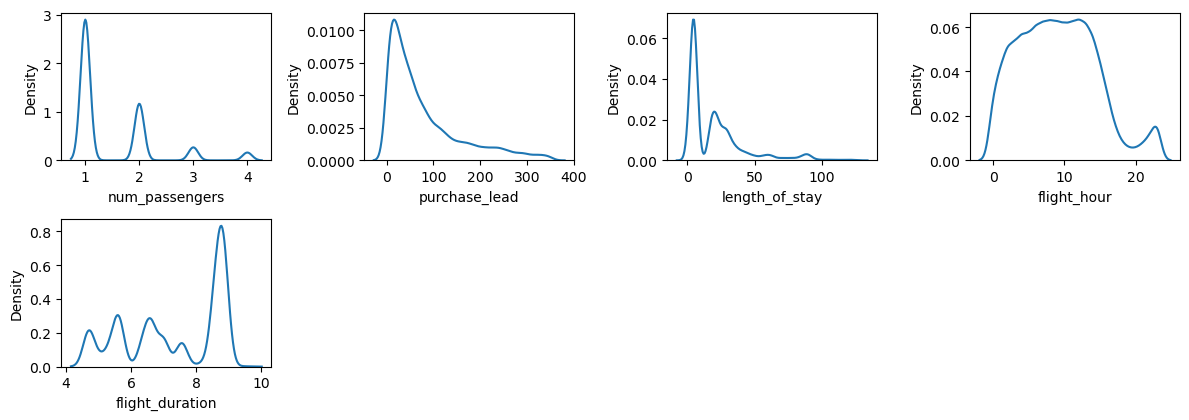

In [27]:
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_8852\3477054487.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\3477054487.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\3477054487.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8852\3477054487.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


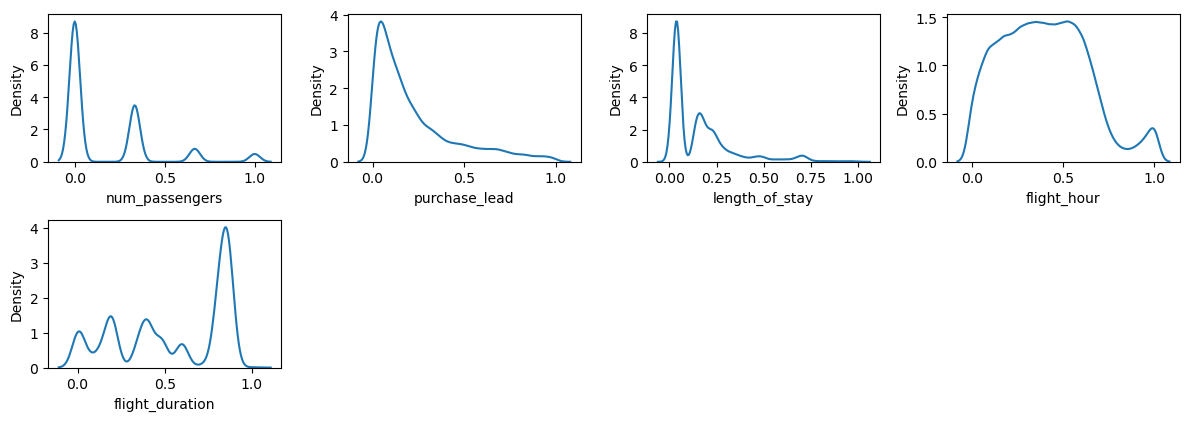

In [28]:
from sklearn.preprocessing import Normalizer
num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num]-num_min)/(num_max-num_min)
num_features.head()

df[num] = num_features

plt.figure(figsize = (12,8))


for i, column in enumerate (df[num].columns,1):
    plt.subplot(4,4,i)
    sns.kdeplot(data = df, x=df[column])
    plt.tight_layout()

# Feature encoding

In [29]:
from sklearn import preprocessing

label_encode = ['sales_channel']
one_hot = ['booking_continent']
                
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

df['trip_type'] = df['trip_type'].map(mapping_trip_type)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df = df.join(onehots)

df.drop('booking_continent', axis = 1, inplace=True)

In [30]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0,1,False,False,False,False,True,False,False
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0,1,False,False,False,False,True,False,False
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0,0,False,True,False,False,False,False,False
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0,1,False,False,False,False,True,False,False
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0,0,False,True,False,False,False,False,False


In [31]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['booking_complete'], axis = 1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
y_train.value_counts(normalize = True)

booking_complete
0    0.851136
1    0.148864
Name: proportion, dtype: float64

As seen above, the data is unbalanced and so we need to balance it by sampling

# Sampling Data


In [ ]:
!pip uninstall scikit-learn --yes

In [ ]:
!pip uninstall imblearn 

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
!pip install imblearn

In [ ]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vend

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [33]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
!pip show scikit-learn  # to see which version and where scikit-learn is installed
!pip freeze  # to see all packages installed in the active virtualenv
"import sklearn; sklearn.show_versions()"

In [34]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train= model.predict(x_over)
    
    
    print("Accuracy(Test Set): %.2f"  % accuracy_score(y_test,y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test,y_pred))
    print("Recall (Test Set): %.2f"  % recall_score(y_test,y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test,y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" %roc_auc_score(y_over, y_pred_train))
          

Accuracy(Test Set): 0.84
Precision (Test Set): 0.34
Recall (Test Set): 0.04
F1-Score (Test Set): 0.07
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.53


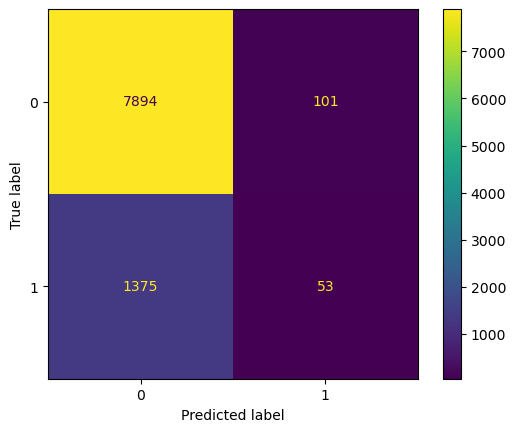

In [35]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
confusionmatrix(predictions)
eval_classification(clf)

In [36]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' :  [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight':[int(x) for x in np.linspace(1, 20, num=11)],
                    'gamma': [float(x) for x in np.linspace(0, 1, num =11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    
                    'lambda' : [float(x) for x in np.linspace(0, 1, num=11)],
                    'alpha'   : [float(x) for x in np.linspace(0, 1, num=11)]
                         }

from xgboost import XGBClassifier
xg = XGBClassifier (random_state = 42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv = 5, random_state = 42, scoring = 'recall')
xg_tuned.fit(x_over, y_over)

eval_classification(xg_tuned)

Accuracy(Test Set): 0.80
Precision (Test Set): 0.28
Recall (Test Set): 0.20
F1-Score (Test Set): 0.24
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.99


              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7995
           1       0.28      0.20      0.24      1428

    accuracy                           0.80      9423
   macro avg       0.57      0.56      0.56      9423
weighted avg       0.78      0.80      0.79      9423



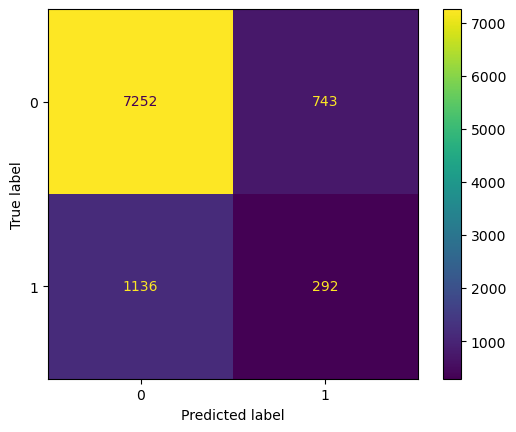

In [38]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)
print(classification_report(y_test,predictions))

It is evident that XGBoost with hyperparameter has a better prediction.

# Feature Importance

<Axes: >

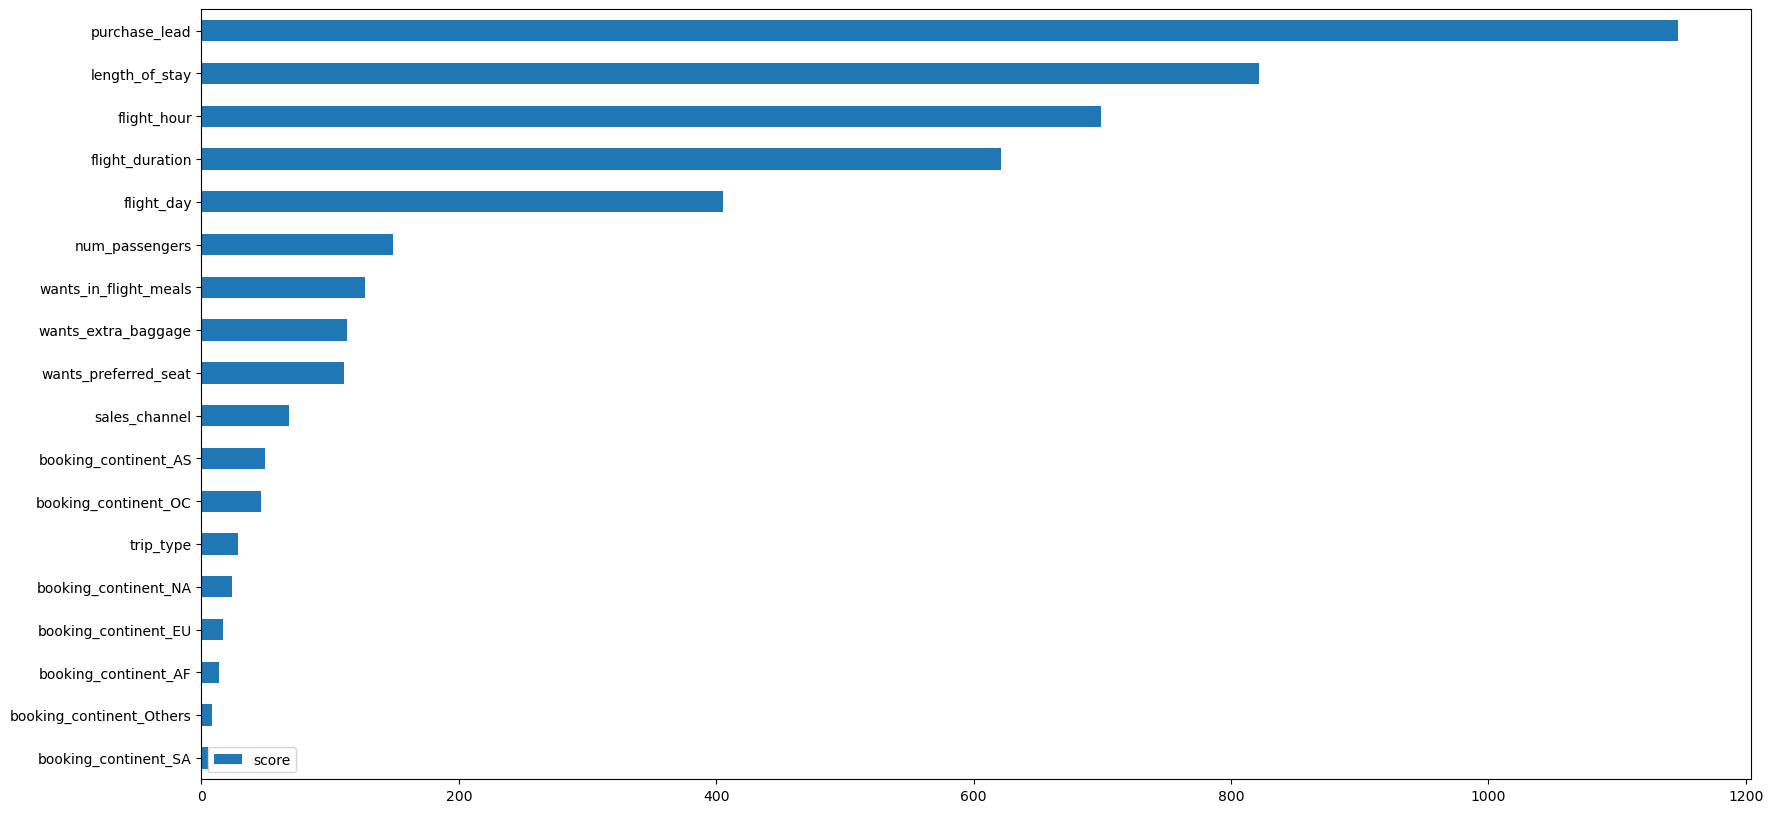

In [43]:
feature_importance = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

data = pd.DataFrame(data = values, index = keys, columns =["score"]).sort_values(by = "score",ascending = True)
data.nlargest(40, columns = "score").sort_values(by = "score", ascending = True).plot(kind = 'barh', figsize = (20,10))




It is therefore safe to conclude that :
1. The most important variable was purchase_lead.
2. Trip type and booking origin were not important.